### First Order Feedforward Filter

<function matplotlib.pyplot.show(close=None, block=None)>

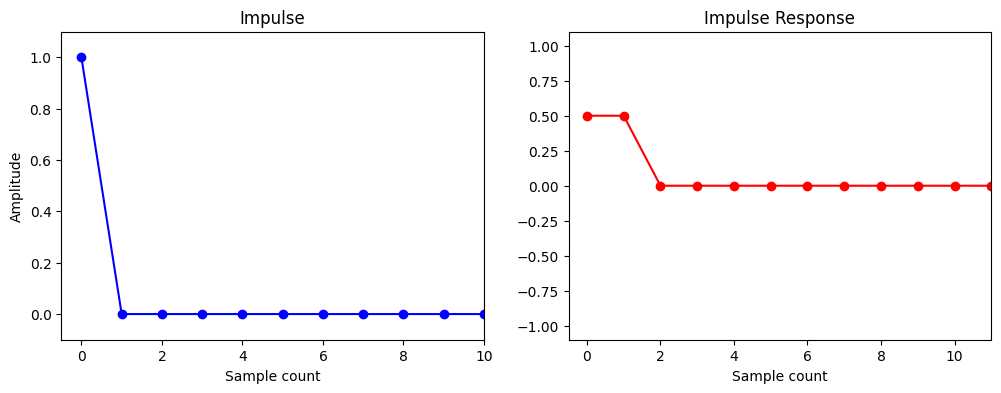

In [6]:
import numpy as np
import matplotlib.pyplot as plt

frameSize = 2048

# x: input signal (impulse)
# a0: filter coefficient (not delayed)
# a1: filter coefficient (delayed)
def feedForwardFilter(x, a0, a1, delay):
    y = np.zeros(x.size)
    for n in range(0, x.size):
        y[n] = a0 * x[n] + a1 * x[n-delay]
    return y

# impulse signal (a single 1 followed by zeroes)
impulse = np.zeros(frameSize)
impulse[0] = 1

# get the filtered signal
impulseResponse = feedForwardFilter(impulse, 0.5, 0.5, 1)

fig, axes = plt.subplots(1, 2, figsize=(12,4))

# plot the input signal
ax = axes[0]
ax.plot(impulse, 'bo-')
ax.set_xlabel('Sample count')
ax.set_ylabel('Amplitude')
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(-0.5, 10)
ax.set_title("Impulse")

# plot the impulse response
ax = axes[1]
ax.plot(impulseResponse, 'ro-')
ax.set_xlabel('Sample count')
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-0.5, 11)
ax.set_title("Impulse Response")

plt.show

We can then perform a Fourier transform on the impulse signal. This will give us an array of complex numbers which is stored in `spectrum`. Extracting the magnitudes of the complex numbers and plotting them will give us a frequency response plot, and extracting the angles will give us a phase response plot.

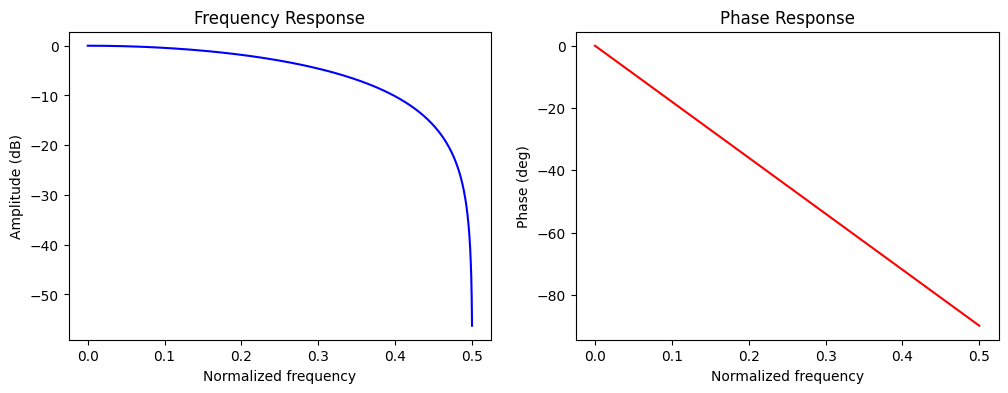

In [7]:
from scipy.fftpack import fft

# fft returns an array of complex numbers representing the frequency components of the input signal, more info: https://docs.scipy.org/doc/scipy/tutorial/fft.html
spectrum = fft(impulseResponse)

# get the frequency values (until Nyquist frequency)
x = np.linspace(start=0, stop=0.5, num=spectrum.size//2)

# set up the plot
fig, axes = plt.subplots(1, 2, figsize=(12,4))

# get the magnitute of each frequency component
with np.errstate(divide='ignore'):
    y = (20 * np.log10(np.abs(spectrum)))[:spectrum.size//2]

# plot the normalized frequency response
ax = axes[0]
ax.plot(x, y, 'b')
ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Amplitude (dB)')
ax.set_title("Frequency Response")

# get the phase angle of each frequency component in radians and convert to degrees
y = np.degrees(np.angle(spectrum))[:spectrum.size//2]

# plot the phase reponse
ax = axes[1]
ax.plot(x, y, 'r')
ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Phase (deg)')
ax.set_title("Phase Response")

plt.show()